In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Create a vertical bar chart using Seaborn, with default colors
###         In this Example, I'm playing with pokemon


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data Folder /pokemon.csv')
data.head(5)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [ ]:
data.shape

(807, 14)

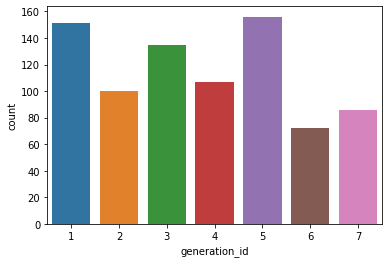

In [ ]:
sns.countplot(data=data,x='generation_id');

###  in the above example :
1. all the columns with different colors, which is poor design and nosiy
2. it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color  


# 2. Create a vertical bar chart using Seaborn, with a uniform single color

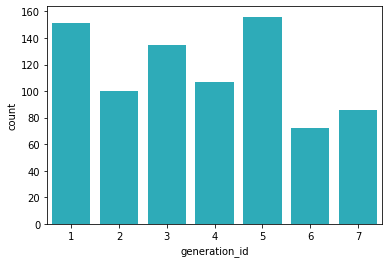

In [ ]:
base_color=sns.color_palette()[9]
sns.countplot(data=data ,x='generation_id' , color=base_color);

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# 3. Create a vertical bar chart using Matplotlib, with a uniform single color


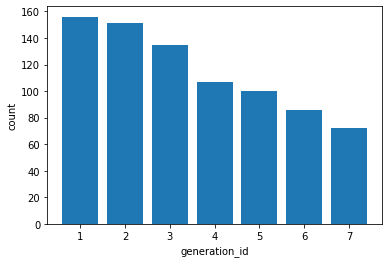

In [ ]:
# i want to have the unique values in the selected column 
x=data['generation_id'].unique()
# i want to know the frequency of each unique value(categorical value)
y=data['generation_id'].value_counts()  # this is wrong code 
plt.bar(x, y);   
# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

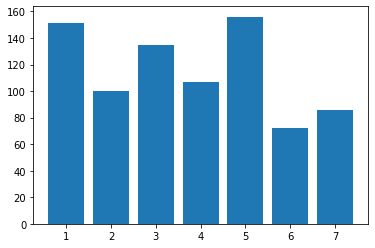

In [ ]:
plt.bar(x,w);

In [ ]:
# Know the differences between count in different formats
z=data['generation_id'].count()
w=data['generation_id'].value_counts(sort=False)
y=data['generation_id'].value_counts()
# _______________________________________________
x=data['generation_id'].unique()

In [ ]:
z

807

In [ ]:
w

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

In [ ]:
y

807

In [ ]:
x

array([1, 2, 3, 4, 5, 6, 7])

# 4. Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()


In [ ]:
freq=data['generation_id'].value_counts().index

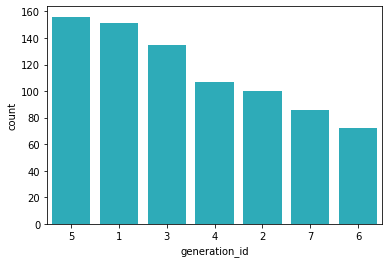

In [ ]:
sns.countplot(data=data ,x='generation_id' ,color=base_color ,order = freq);

# 5. Rotate the category labels (not axes)

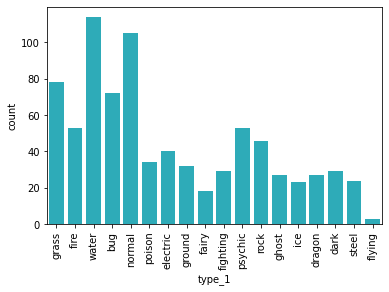

In [ ]:
# Plot the Pokemon type on a Vertical bar chart
sns.countplot(data=data , x='type_1', color=base_color);
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

# 6. Rotate the axes clockwise

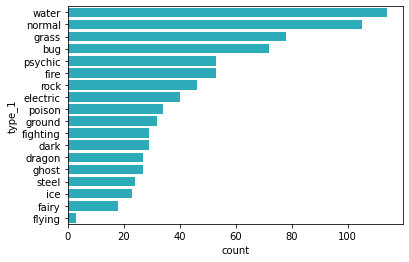

In [ ]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = data['type_1'].value_counts().index
sns.countplot(data=data , y='type_1', color=base_color, order=type_order);

# 7. Data wrangling to reshape the pokemon dataframe :
### 1. Select the 'id', and 'species' columns from pokemon.
### 2. Remove the 'type_1', 'type_2' columns from pokemon
### 3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
### 4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having id=1 and species=bulbasaur will now occur twice in the resulting dataframe after the melt() operation. The first occurrence will have type=grass, whereas, the second occurrence will have type=poison


In [ ]:
pkmn_types=data.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'],var_name='type_level', value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [ ]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_count=pkmn_types['type'].value_counts()
type_count

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [ ]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_count.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

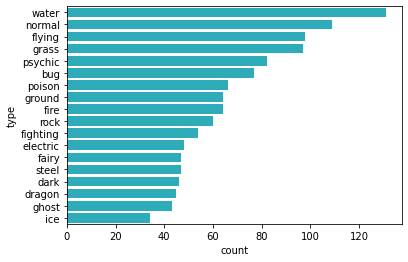

In [ ]:
sns.countplot(data=pkmn_types ,y='type', color=base_color ,order=type_order)

# 8.  Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

### Step(1); Find the maximum proportion of bar

In [ ]:
# Returns the sum of all not-null values in `type` column
sums=pkmn_types['type'].value_counts().sum()
sums

1212

In [ ]:
# Return the highest frequency in the `type` column
max_type=type_count[0]
max_type

131

In [ ]:
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type / sums
print(max_prop)

0.10808580858085809


### Step 2. Create an array of evenly spaced proportioned values

In [ ]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

### Step 3. Create a list of String values that can be used as tick labels.

In [ ]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

### Step 4. Plot the bar chart, with new x-tick labels


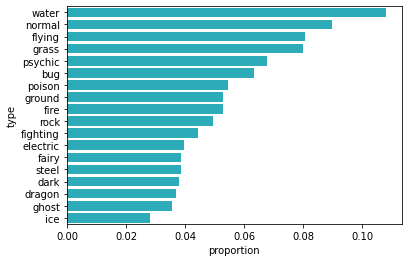

In [ ]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * sums, tick_names)
plt.xlabel('proportion');

# 9. Print the text (proportion) on the bars of a horizontal plot.


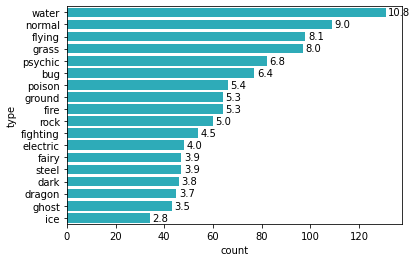

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sns.color_palette()[9]
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/sums)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

# 10.  Print the text (proportion) below the bars of a Vertical plot.

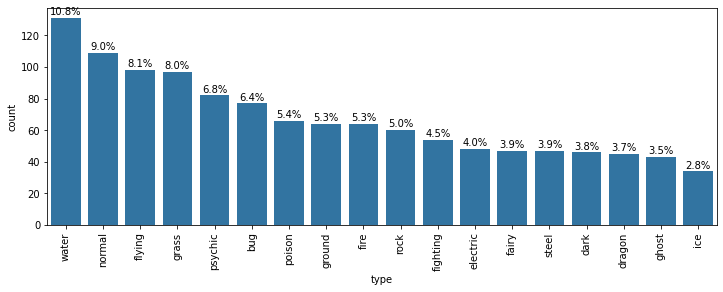

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sums)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4